# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [30]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

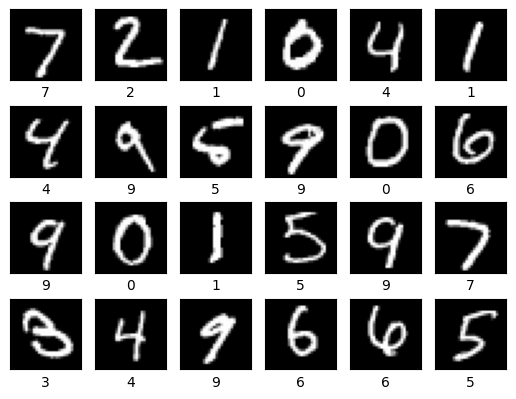

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [ ]:
# < ENTER YOUR CODE HERE >

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [45]:
from sklearn.cluster import KMeans
# Распрямить изображения
n_samples = X_train.shape[0]
X_train = X_train.reshape((n_samples, -1))


n_samples_test = X_test.shape[0]
X_test = X_test.reshape((n_samples_test, -1))

# Обучить модель KMeans
kmeans = KMeans(n_clusters=10, random_state=7)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=7)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [46]:
import numpy as np
# Получить метки кластеров
labels = kmeans.labels_

# Подсчитать количество элементов в кластере с меткой 2
count = np.sum(labels == 2)

print(count)

1186


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



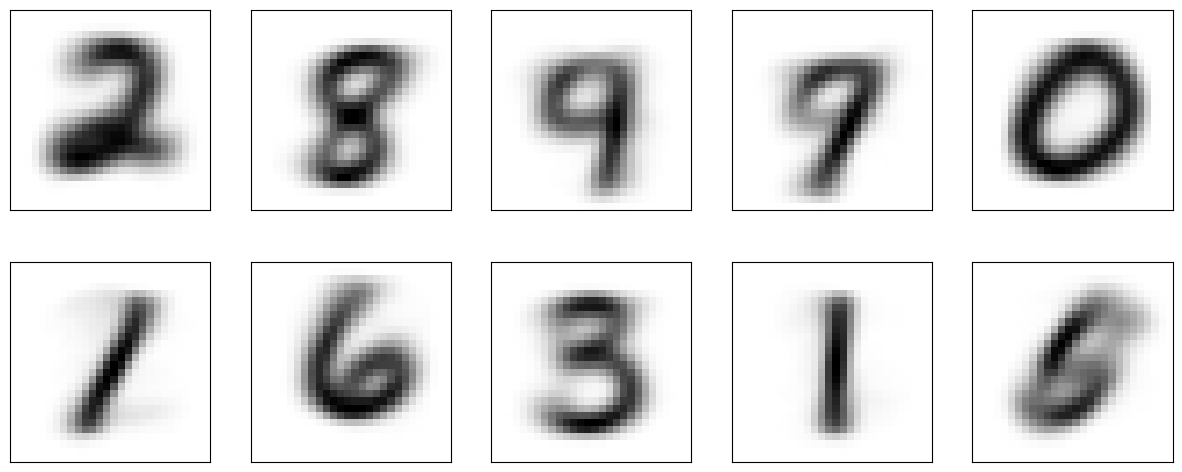

In [47]:
import matplotlib.pyplot as plt

# Построить изображения, соответствующие центроидам
centroids = kmeans.cluster_centers_
centroids_reshaped = centroids.reshape((10, 28, 28))

fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
axes = axes.ravel()

for index, ax in enumerate(axes):
    ax.imshow(centroids_reshaped[index], cmap=plt.cm.binary)

plt.show()

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [36]:
# # Присвоить кластерам метки наиболее представленных в них цифр
# cluster_labels = np.argmax(kmeans.labels_[:, np.newaxis] == labels, axis=1)

# # Получить преобразованные метки кластеров
# transformed_labels = [label for label in cluster_labels]

# # Сравнить преобразованные метки с изображениями на основе центроидов
# for i in range(10):
#     print(f"Метка кластера {i}: {transformed_labels[i]}")
#     plt.imshow(centroids_reshaped[i], cmap=plt.cm.binary)
#     plt.title(f"Метка кластера: {transformed_labels[i]}")
#     plt.show()



In [48]:
from scipy.stats import mode
import numpy as np

clusters = labels

corrected_clusters = np.zeros_like(clusters)
cluster_values = []
for i in range(10):
    mask = (clusters == i)
    corrected_clusters[mask] = mode(y_train[mask])[0]
    cluster_values.append(mode(y_train[mask])[0])

In [49]:
print([x for x in cluster_values])

[2, 8, 4, 7, 0, 1, 6, 3, 1, 5]


Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [50]:
from sklearn.metrics import accuracy_score

# Присвоить объектам метки кластеров
predicted_labels = kmeans.predict(X_train)

# Сравнить предсказанные метки с истинными метками
accuracy = accuracy_score(y_train, predicted_labels)

print("Точность на тренировочном наборе данных:", accuracy)



При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [43]:
from sklearn.metrics import accuracy_score

# Получение меток кластеров для обучающего и тестового наборов данных
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)  # X_test - ваш тестовый набор данных

# Оценка accuracy для обучающего и тестового наборов данных
train_accuracy = accuracy_score(y_train, train_cluster_labels)
test_accuracy = accuracy_score(y_test, test_cluster_labels)

print("Accuracy для тренировочного набора данных:", train_accuracy)
print("Accuracy для тестового набора данных:", test_accuracy)


ValueError: Found array with dim 3. KMeans expected <= 2.

Постройте матрицу ошибок.

In [ ]:
import pandas as pd

# Построить матрицу ошибок
error_matrix = pd.crosstab(y_test, transformed_labels)
print(error_matrix)


col_0    0    1    2    4    6   7
row_0                             
0        8    7    0  170    7   0
1        0    0  222    1    0   0
2      130    9   34   14    1   2
3       14   37   15  132    1   1
4       65   83    7    0    3  46
5       36   81    9   58    2   5
6        4   18   12    6  165   0
7       64   32   19    1    0  93
8       17  120   16   43    3   4
9       20   64    6    2    1  90


С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
# Определить цифру, с которой модель чаще всего путала другие цифры
most_confused_digit = error_matrix.idxmax(axis=1).mode()[0]
print(f"Наиболее часто путаемая цифра: {most_confused_digit}")

Наиболее часто путаемая цифра: 1


Вычислите точность модели на тестовых данных.

In [ ]:
# < ENTER YOUR CODE HERE >

Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

In [ ]:
# < ENTER YOUR CODE HERE >

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [ ]:
from sklearn.manifold import TSNE

# Преобразовать тренировочный набор данных с помощью TSNE
tsne = TSNE(n_components=2, init='random', random_state=7)
X_train_tsne = tsne.fit_transform(X_train)




Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Кластеризовать полученный набор данных с помощью KMeans
kmeans = KMeans(n_clusters=10, random_state=7)
kmeans.fit(X_train_tsne)

# Переназначить метки кластеров
cluster_labels = np.argmax(kmeans.labels_[:, np.newaxis] == labels, axis=1)

# Оценить точность модели на тренировочных данных
accuracy = accuracy_score(y_train, cluster_labels)
print("Точность на тренировочных данных:", accuracy)

Точность на тренировочных данных: 0.054875


Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.